In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("ipl.csv")
df.head()
df.describe()

,matchId,inning,over_ball,over,ball,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,8381.000000,1093.000000,673.000000,4001.000000,2.0
mean,9.070665e+05,1.483531,9.560015,9.197677,3.623452,1.265001,0.067806,1.201050,1.032022,1.866270,1.307673,5.0
std,3.679913e+05,0.502643,5.686116,5.683484,1.813850,1.639298,0.343265,0.783803,0.314310,1.312692,0.852387,0.0
min,3.359820e+05,1.000000,0.100000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0
25%,5.483340e+05,1.000000,4.500000,4.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0
50%,9.809670e+05,1.000000,9.400000,9.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0
75%,1.254066e+06,2.000000,14.400000,14.000000,5.000000,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,5.0
max,1.426312e+06,6.000000,19.900000,19.000000,11.000000,6.000000,7.000000,5.000000,5.000000,4.000000,5.000000,5.0


In [3]:
df.fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   matchId           260920 non-null  int64  
 1   inning            260920 non-null  int64  
 2   over_ball         260920 non-null  float64
 3   over              260920 non-null  int64  
 4   ball              260920 non-null  int64  
 5   batting_team      260920 non-null  object 
 6   bowling_team      260920 non-null  object 
 7   batsman           260920 non-null  object 
 8   non_striker       260920 non-null  object 
 9   bowler            260920 non-null  object 
 10  batsman_runs      260920 non-null  int64  
 11  extras            260920 non-null  int64  
 12  isWide            260920 non-null  float64
 13  isNoBall          260920 non-null  float64
 14  Byes              260920 non-null  float64
 15  LegByes           260920 non-null  float64
 16  Penalty           26

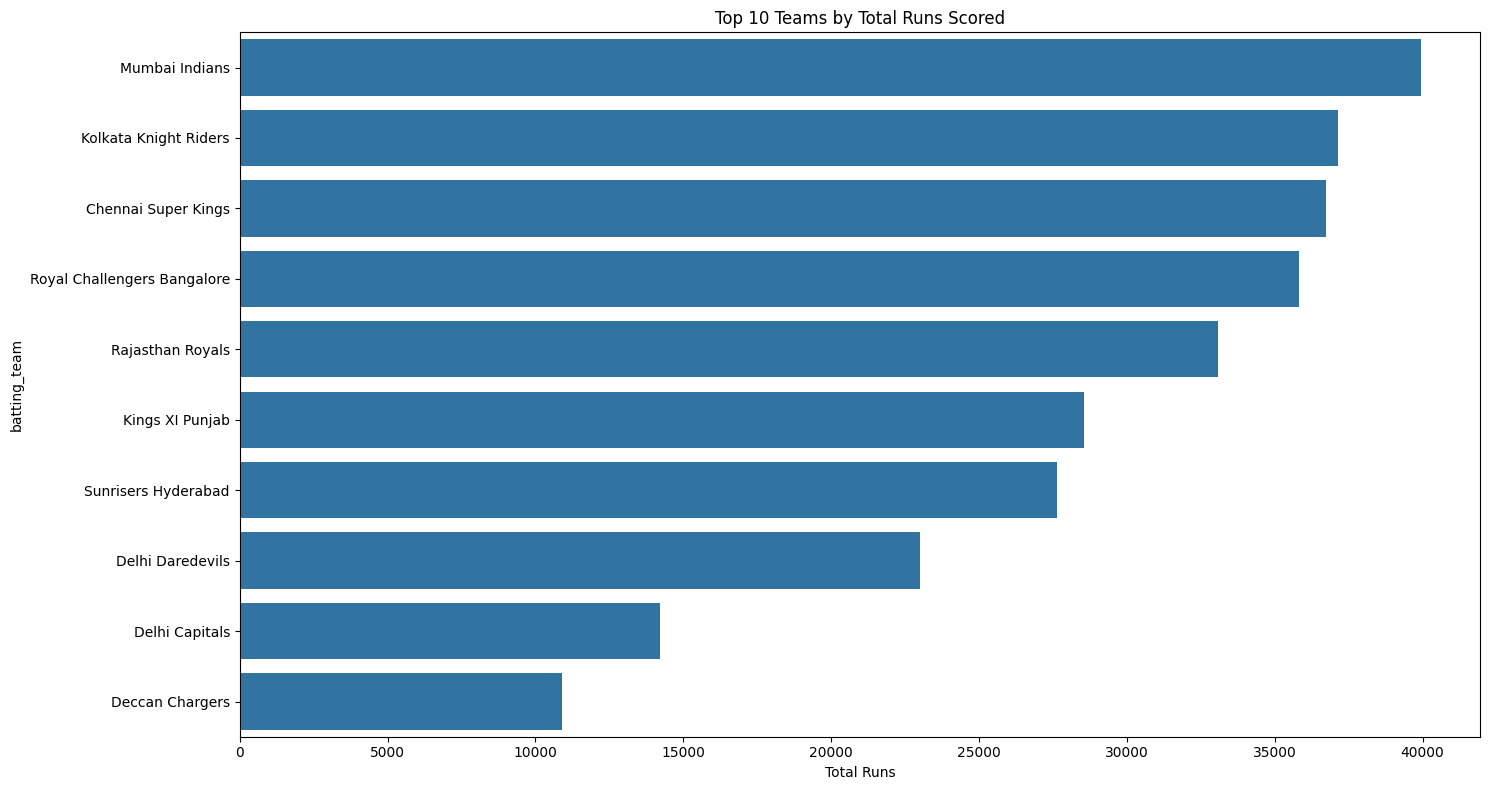

In [4]:
plt.figure(figsize=(15, 8))
tt_runs = df.groupby('batting_team')['batsman_runs'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=tt_runs.values,y=tt_runs.index,)
plt.xlabel('Total Runs')
plt.title('Top 10 Teams by Total Runs Scored')
plt.tight_layout()
plt.show()

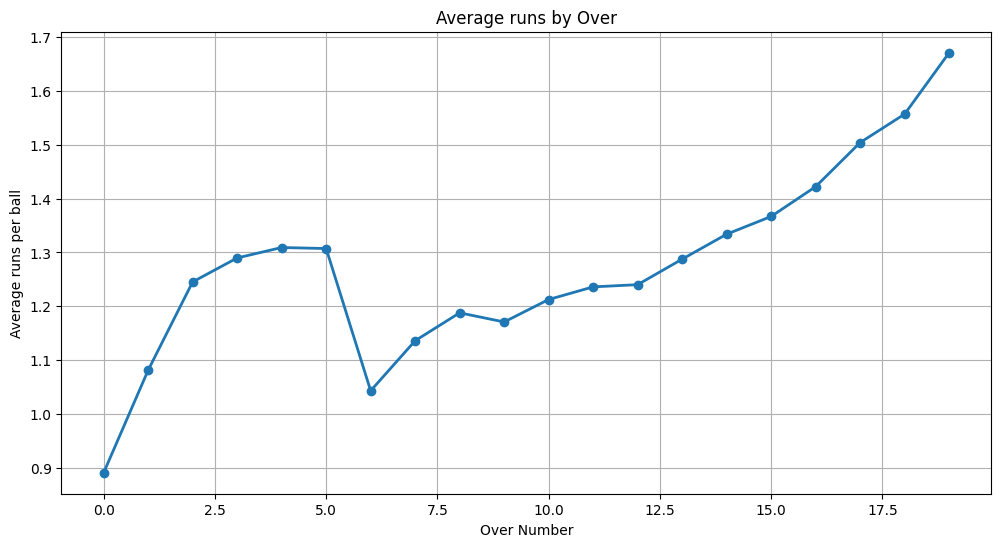

In [5]:
plt.figure(figsize=(12, 6))
over_runs = df.groupby('over')['batsman_runs'].mean()
plt.plot(over_runs.index, over_runs.values, marker='o', linewidth=2)
plt.xlabel('Over Number')
plt.ylabel('Average runs per ball')
plt.title('Average runs by Over')
plt.grid(True)
plt.show()

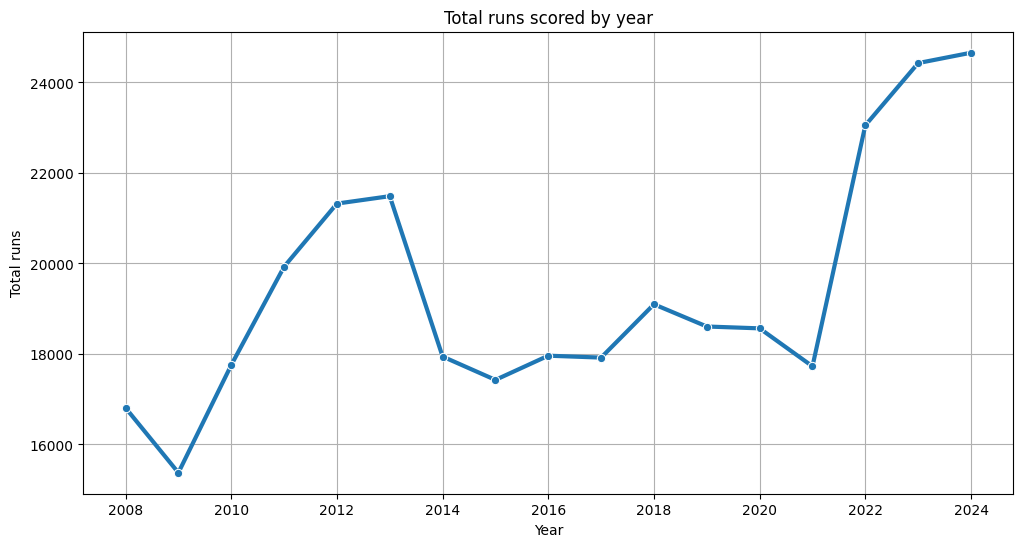

In [6]:
df['year'] = pd.to_datetime(df['date']).dt.year
plt.figure(figsize=(12, 6))
yearly_runs = df.groupby('year')['batsman_runs'].sum()
sns.lineplot(x=yearly_runs.index, y=yearly_runs.values, marker='o', linewidth=3)
plt.xlabel('Year')
plt.ylabel('Total runs')
plt.title('Total runs scored by year')
plt.grid(True)
plt.show()